Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Datasets/nba.csv')

In [3]:
# Display 1st 5 Records
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [4]:
# Display last 5 records
data.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.dtypes

Name         object
Team         object
Number      float64
Position     object
Age         float64
Height       object
Weight      float64
College      object
Salary      float64
dtype: object

In [6]:
data.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [8]:
data.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [9]:
data.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [10]:
data.shape

(458, 9)

In [11]:
# mode of college
m1 = data['College'].mode()[0]
print("Mode of College : ",m1)

Mode of College :  Kentucky


In [12]:
# Mean Salary
m2 = data['Salary'].mean()
print("Mean Salary :" ,m2)

Mean Salary : 4842684.105381166


In [13]:
# Handle missing values

# Drop rows where missing value is 1
data = data.dropna(subset=['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight'])

# Fill missing College values with the mode
data['College'] = data['College'].fillna(m1)

# Fill missing Salary values with the mean
data['Salary'] = data['Salary'].fillna(m2)

In [14]:
data.isnull().sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

In [15]:
data.shape

(457, 9)

In [16]:
# Value Counts
data['Age'].value_counts()

Age
24.0    47
25.0    45
27.0    41
23.0    41
26.0    36
30.0    31
28.0    31
29.0    28
22.0    26
31.0    22
21.0    19
20.0    19
33.0    14
32.0    13
34.0    10
36.0    10
35.0     9
37.0     4
38.0     4
40.0     3
19.0     2
39.0     2
Name: count, dtype: int64

Age Vs No. of Players

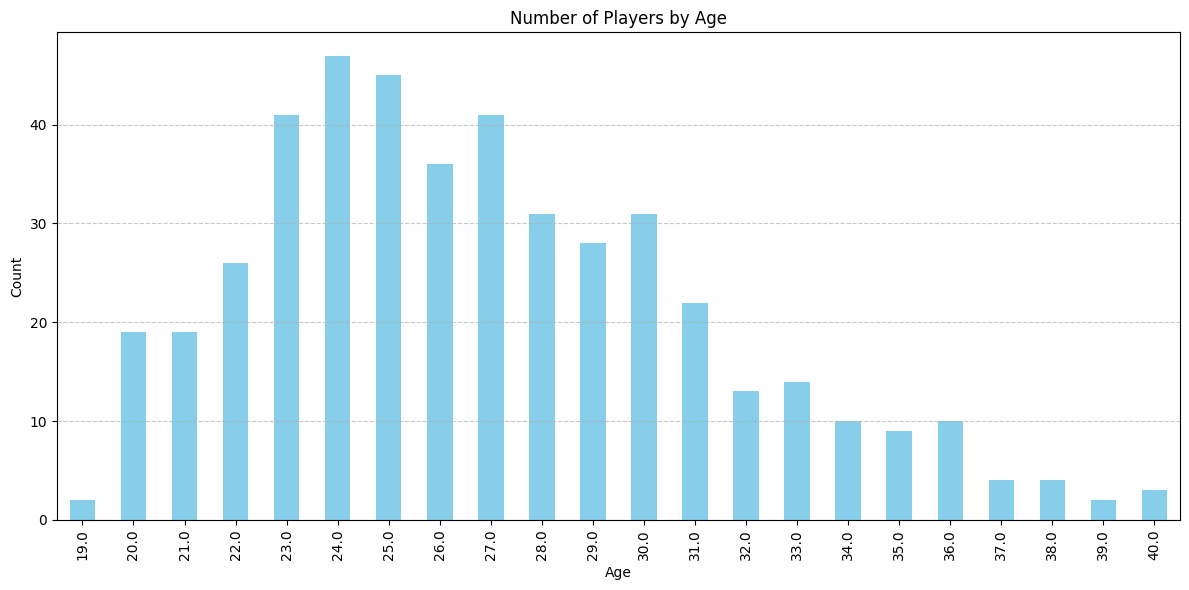

In [17]:
import matplotlib.pyplot as plt

# Plot the value counts
data['Age'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='skyblue')

plt.title('Number of Players by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
# Group by Age 
group_age = data.groupby('Age')
print(group_age)

In [20]:
age_group_counts = group_age.size()
print(age_group_counts)

Age
19.0     2
20.0    19
21.0    19
22.0    26
23.0    41
24.0    47
25.0    45
26.0    36
27.0    41
28.0    31
29.0    28
30.0    31
31.0    22
32.0    13
33.0    14
34.0    10
35.0     9
36.0    10
37.0     4
38.0     4
39.0     2
40.0     3
dtype: int64


In [21]:
age_data = group_age.head()
print(age_data)

              Name                    Team  Number Position   Age Height  \
0    Avery Bradley          Boston Celtics     0.0       PG  25.0    6-2   
1      Jae Crowder          Boston Celtics    99.0       SF  25.0    6-6   
2     John Holland          Boston Celtics    30.0       SG  27.0    6-5   
3      R.J. Hunter          Boston Celtics    28.0       SG  22.0    6-5   
4    Jonas Jerebko          Boston Celtics     8.0       PF  29.0   6-10   
..             ...                     ...     ...      ...   ...    ...   
299  Manu Ginobili       San Antonio Spurs    20.0       SG  38.0    6-6   
304   Andre Miller       San Antonio Spurs    24.0       PG  40.0    6-3   
306    Tony Parker       San Antonio Spurs     9.0       PG  34.0    6-2   
400  Kevin Garnett  Minnesota Timberwolves    21.0       PF  40.0   6-11   
420  Nazr Mohammed   Oklahoma City Thunder    13.0        C  38.0   6-10   

     Weight            College        Salary  
0     180.0              Texas  7.730337

In [41]:
# Group by Salary
group_salary = data.groupby('Salary')
salary_group_counts = group_salary.size()
print(salary_group_counts)

Salary
30888.0       1
55722.0       2
83397.0       1
111196.0      1
111444.0      2
             ..
22192730.0    1
22359364.0    1
22875000.0    1
22970500.0    1
25000000.0    1
Length: 310, dtype: int64


In [23]:
salary_data = group_salary.head()
print(salary_data)

              Name            Team  Number Position   Age Height  Weight  \
0    Avery Bradley  Boston Celtics     0.0       PG  25.0    6-2   180.0   
1      Jae Crowder  Boston Celtics    99.0       SF  25.0    6-6   235.0   
2     John Holland  Boston Celtics    30.0       SG  27.0    6-5   205.0   
3      R.J. Hunter  Boston Celtics    28.0       SG  22.0    6-5   185.0   
4    Jonas Jerebko  Boston Celtics     8.0       PF  29.0   6-10   231.0   
..             ...             ...     ...      ...   ...    ...     ...   
450     Joe Ingles       Utah Jazz     2.0       SF  28.0    6-8   226.0   
452     Trey Lyles       Utah Jazz    41.0       PF  20.0   6-10   234.0   
453   Shelvin Mack       Utah Jazz     8.0       PG  26.0    6-3   203.0   
454      Raul Neto       Utah Jazz    25.0       PG  24.0    6-1   179.0   
455   Tibor Pleiss       Utah Jazz    21.0        C  26.0    7-3   256.0   

               College        Salary  
0                Texas  7.730337e+06  
1        

In [24]:
# Average Salary by Position
data.groupby('Position')['Salary'].mean()

Position
C     5.967052e+06
PF    4.570889e+06
PG    5.067606e+06
SF    4.857220e+06
SG    4.034356e+06
Name: Salary, dtype: float64

In [25]:
# Average Salary by Age
data.groupby('Age')['Salary'].mean()

Age
19.0    1.930440e+06
20.0    2.725791e+06
21.0    2.067380e+06
22.0    2.357963e+06
23.0    2.171719e+06
24.0    3.830295e+06
25.0    3.951130e+06
26.0    6.866566e+06
27.0    6.632008e+06
28.0    5.101559e+06
29.0    6.174838e+06
30.0    6.990272e+06
31.0    8.511397e+06
32.0    7.716958e+06
33.0    3.930739e+06
34.0    7.606030e+06
35.0    3.615178e+06
36.0    2.238120e+06
37.0    1.079400e+07
38.0    1.840041e+06
39.0    2.517872e+06
40.0    4.666917e+06
Name: Salary, dtype: float64

Part 2

In [26]:
iris = pd.read_csv('../Datasets/Iris.csv')

In [27]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
iris.shape

(150, 5)

In [29]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [30]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [32]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [33]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Write a function to check for each species and use describe().transpose() 
function to display some basic statistical details like percentile, mean, 
standard deviation etc. of all species, sepal length, sepal width, petal 
length and petal width 

In [34]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
iris.transpose()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal_length,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal_width,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal_length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal_width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
species,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,Iris-setosa,...,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica


In [36]:
#species-wise descriptive summary
iris.groupby('species').describe().transpose()

species             Iris-setosa  Iris-versicolor  Iris-virginica
sepal_length count    50.000000        50.000000       50.000000
             mean      5.006000         5.936000        6.588000
             std       0.352490         0.516171        0.635880
             min       4.300000         4.900000        4.900000
             25%       4.800000         5.600000        6.225000
             50%       5.000000         5.900000        6.500000
             75%       5.200000         6.300000        6.900000
             max       5.800000         7.000000        7.900000
sepal_width  count    50.000000        50.000000       50.000000
             mean      3.418000         2.770000        2.974000
             std       0.381024         0.313798        0.322497
             min       2.300000         2.000000        2.200000
             25%       3.125000         2.525000        2.800000
             50%       3.400000         2.800000        3.000000
             75%       3.675000         3.000000        3.175000
             max       4.400000         3.400000        3.800000
petal_length count    50.000000        50.000000       50.000000
             mean      1.464000         4.260000        5.552000
             std       0.173511         0.469911        0.551895
             min       1.000000         3.000000        4.500000
             25%       1.400000         4.000000        5.100000
             50%       1.500000         4.350000        5.550000
             75%       1.575000         4.600000        5.875000
             max       1.900000         5.100000        6.900000
petal_width  count    50.000000        50.000000       50.000000
             mean      0.244000         1.326000        2.026000
             std       0.107210         0.197753        0.274650
             min       0.100000         1.000000        1.400000
             25%       0.200000         1.200000        1.800000
             50%       0.200000         1.300000        2.000000
             75%       0.300000         1.500000        2.300000
             max       0.600000         1.800000        2.500000

In [37]:
# Species wise mean
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Function to describe species

In [38]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [39]:
def describe_species(data, species_name):
    if species_name not in data['species'].unique():
        print('not found')
        return
    
    species_data = data[data['species'] == species_name]
    print(species_data.describe().transpose())


In [40]:
# Calling function for each species

print("Iris-setosa")
print()
describe_species(iris,"Iris-setosa")
print()

print("Iris-versicolor")
print()
describe_species(iris,"Iris-versicolor")
print()

print("Iris-virginica")
print()
describe_species(iris,"Iris-virginica")

Iris-setosa

              count   mean       std  min    25%  50%    75%  max
sepal_length   50.0  5.006  0.352490  4.3  4.800  5.0  5.200  5.8
sepal_width    50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4
petal_length   50.0  1.464  0.173511  1.0  1.400  1.5  1.575  1.9
petal_width    50.0  0.244  0.107210  0.1  0.200  0.2  0.300  0.6

Iris-versicolor

              count   mean       std  min    25%   50%  75%  max
sepal_length   50.0  5.936  0.516171  4.9  5.600  5.90  6.3  7.0
sepal_width    50.0  2.770  0.313798  2.0  2.525  2.80  3.0  3.4
petal_length   50.0  4.260  0.469911  3.0  4.000  4.35  4.6  5.1
petal_width    50.0  1.326  0.197753  1.0  1.200  1.30  1.5  1.8

Iris-virginica

              count   mean       std  min    25%   50%    75%  max
sepal_length   50.0  6.588  0.635880  4.9  6.225  6.50  6.900  7.9
sepal_width    50.0  2.974  0.322497  2.2  2.800  3.00  3.175  3.8
petal_length   50.0  5.552  0.551895  4.5  5.100  5.55  5.875  6.9
petal_width    50.0  2.026  0